# Two Agent Copilot<br/>with Semantic Intent

This is a sample of two Assistants being used as agents in a complex Copilot solution.

Agents:
- **Sales Agent:** It is implemented with an Assistants API that can perform calculations and can provide the user information customer, sellers, customer orders, and inventory.
- **Trading Agent:** It is implemented with an Assistant API with function calling and code interpreter to get the latest stock prices and can provide the user with up to date prices and perform portfolio calculations.

Coordination:
- **Semantic Intent:** Semantic intent is the component that determines which agent to call

Possible Chat handling:
1. No handling: a la LLM model
2. Manual handling: user write logic to coordinate messages between two agent
3. Hybrid: One agent keeps state the other just used as LLM

Diagram:

```mermaid
graph LR;
  U(User Prompt)<-->SI(Semantic<br/>Intent);
  SI<-->OpenAI(Semantic Intent<br/>Prompt);
  SI<-->SA(Sales<br/>Agent);
  SI<-->TA(Trading<br/>Agent)
```

### Load the required libraries

In [1]:
import os
import sales_agent
import trading_agent

from AgentSettings import AgentSettings
from openai import AzureOpenAI

### Load the environment variables

In [2]:
settings = AgentSettings()

In [3]:
client = AzureOpenAI(api_key=settings.api_key,
        api_version=settings.api_version,
        azure_endpoint=settings.api_endpoint)

### Create the AzureOpenAI clients

In [4]:
trading_agent = trading_agent.get_agent(settings,client)

In [5]:
sales_agent = sales_agent.get_agent(settings,client)

data/sales/sellers.csv
data/sales/customers.csv
data/sales/orders.csv
data/sales/inventory.csv


### Determine intent semantically

In [13]:
def semantic_intent(prompt:str)->str:
    prompt_template = """system:
You are an agent that can determine intent from the following list of intents and return the intent that best matches the user's question.
 
List of intents:
SalesAgent: questions or operations related to calculations, customers, sales, orders, inventory, items, and sellers.
TradingAgent: questions or operations related to trading, stocks, investments, and financial markets.
OtherAgent: any other question

user:
<QUESTION>

Output in ONE word."""


    full_prompt = prompt_template.replace("<QUESTION>", prompt)
    completion = client.chat.completions.create(
            model=settings.model_deployment,
            messages=[
                {
                    "role": "user",
                    "content": full_prompt,
                },
            ],
            max_tokens=2,
            temperature=0.1           
        )    
    try:
        return completion.choices[0].message.content
    except:
        return "Unknown"
    

### Process for intent

In [14]:
def process_for_intent(user: str, user_id: str, prompt: str):
    intent = semantic_intent(prompt)
    print(f"Intent: {intent}")
    
    if intent=="SalesAgent":
        sales_agent.process_prompt(user, user_id, prompt)
    elif intent=="TradingAgent":
        trading_agent.process_prompt(user, user_id, prompt)
    elif intent=="OtherAgent":
        completion = client.chat.completions.create(
            model=settings.model_deployment,
            messages=[
                {
                    "role": "user",
                    "content": prompt,
                }
            ]
        )
        print(completion.choices[0].message.content)
    else:        
        print("Unknown Intent")

### Have a conversation with the Assistant

In [15]:
process_for_intent("Suzan", "user_123", "What is the speed of light?")

Intent: OtherAgent
The speed of light in a vacuum is a fundamental physical constant that is precisely 299,792,458 meters per second (approximately 186,282 miles per second). This value is represented by the symbol c and is one of the most important constants in physics because it is the speed at which all massless particles and associated fields—including electromagnetic radiation such as light—travel in a vacuum. Moreover, according to the special theory of relativity, the speed of light is the maximum speed at which all conventional matter and information can travel.


Intent: SalesAgent
processing ...
user: John:
Chart the products sold by State?

assistant:
To assist you effectively, I'll first need to check the contents of the uploaded files to identify which one contains the relevant data about products and states. After identifying the correct file, I will proceed to chart the products sold by State. I will start by examining the files to determine their contents and structure. Please hold on while I perform this check.

assistant:
The relevant data needed to chart the products sold by state seems to span across multiple files. Here’s my understanding of the content in each file based on the initial analysis:

1. `/mnt/data/assistant-BV61w15yhRVLRH5vndeolU1t` contains seller information with columns: `SellerID`, `Name`, and `State`.
2. `/mnt/data/assistant-wKn1f9W8nlsou4dKeZz6SUB6` contains customer information with columns: `CustomerID`, `Name`, and `State`.
3. `/mnt/data/assistant-MAJ4AViqwVNWtxuj3aMbvtD7` contains order information with colum

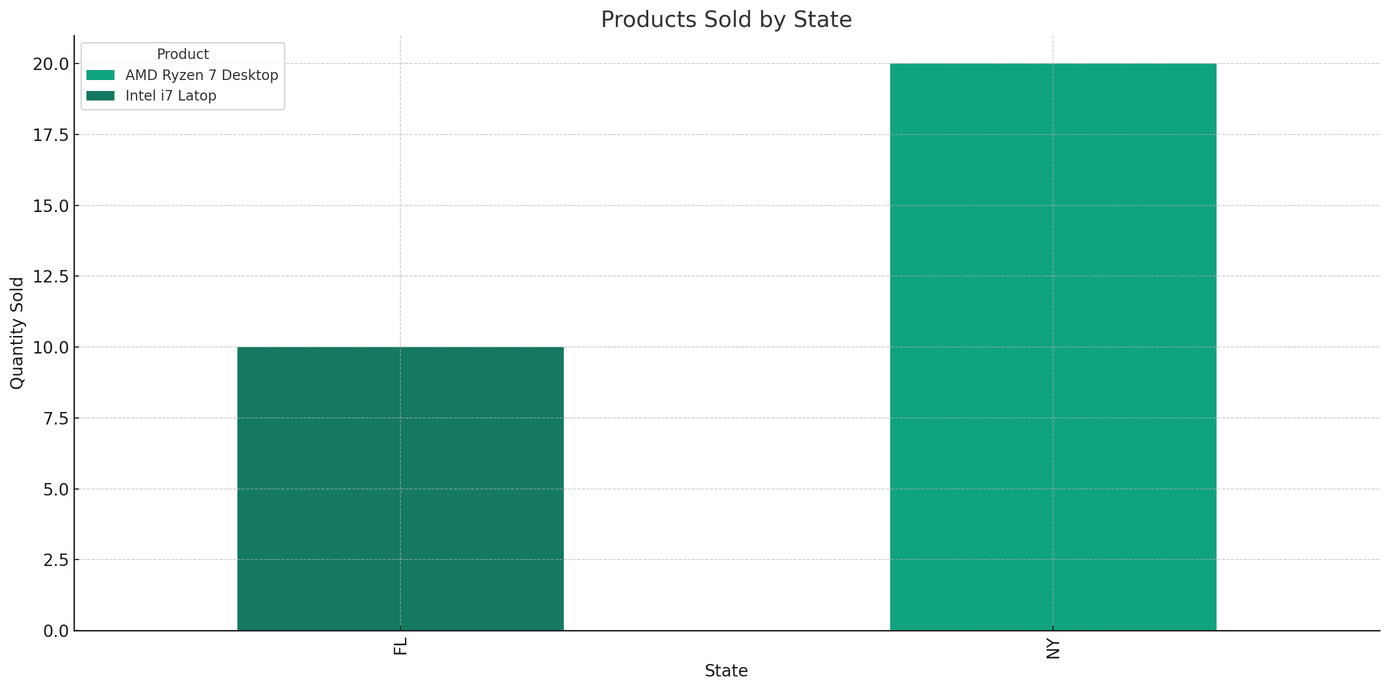

assistant:
The chart displaying the products sold by State has been successfully created. If you have further questions or need additional assistance, please let me know.

Deleted thread:  thread_UMWUUakuaIcQrYajMNT2aw5l


In [16]:
process_for_intent("John", "user_123", "Chart the products sold by State?")

In [15]:
process_for_intent("John", "user_123", "What is the current MSFT price?")

Intent: TradingAgent
processing ...
Function Calling
{'tool_calls': [{'id': 'call_ZvQ6u8X8SiLaUf0iJrFHPJqB', 'function': {'arguments': '{"symbol":"MSFT"}', 'name': 'get_stock_price'}, 'type': 'function'}]}
Submitting outputs back to the Assistant...
user: John:
What is the current MSFT price?

assistant:
The current price of Microsoft Corporation (MSFT) stock is $410.34. If you have any further questions, please let me know.

Deleted thread:  thread_b7uzyOID7PzT36ZeUp4BIdle


### Cleanup

In [17]:
sales_agent.cleanup()
trading_agent.cleanup()

AssistantDeleted(id='asst_FSzpWF0GeW7G6o7sYpzUfyUc', deleted=True, object='assistant.deleted')
Deleting:  0  threads.
Deleting:  4  files.
FileDeleted(id='assistant-BV61w15yhRVLRH5vndeolU1t', deleted=True, object='file')
FileDeleted(id='assistant-wKn1f9W8nlsou4dKeZz6SUB6', deleted=True, object='file')
FileDeleted(id='assistant-MAJ4AViqwVNWtxuj3aMbvtD7', deleted=True, object='file')
FileDeleted(id='assistant-IqoOjCGcrZBXgRHaNBbogDBY', deleted=True, object='file')
AssistantDeleted(id='asst_sOs2MjNhHug1XUM6vLK1GSnx', deleted=True, object='assistant.deleted')
Deleting:  0  threads.
Deleting:  0  files.
